###Nesse notebook em específico, teremos como objetivo desmontrar, de forma visual, o desvio-padrão do consumo percapita de cada classe e de cada região com relação a um determinado Item.

In [111]:
#importando as bibliotecas
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [112]:
#Obtendo o caminho do arquivo
caminho_consumo_2='/content/drive/MyDrive/DCC_SIRIUS/consumo_2.xlsx'

In [113]:
#Lendo o arquivo
consumo_2=pd.read_excel(caminho_consumo_2)
consumo_2.head(1)

,Unnamed: 0,Items,Região,Total,Classe,Produção (t)
0,0,Arroz polido,Brasil,18.22,Classe F,20.48


In [114]:
#Obtendo os nomes de suas colunas
consumo_2.columns

Index(['Unnamed: 0', 'Items', 'Região', 'Total', 'Classe', 'Produção (t)'], dtype='object')

In [115]:
#Fazendo um tratamento básico de nosso banco de dados
consumo_2=consumo_2[['Items', 'Região', 'Total', 'Classe', 'Produção (t)']]
consumo_2=consumo_2.rename(columns={'Produção (t)':'Consumo percapita'})

In [116]:
consumo_2.Items.unique()

array([' Arroz polido', 'Feijão-mulatinho', 'Feijão-preto',
       'Farinha de mandioca', 'Farinha de trigo', 'Fubá de milho',
       'Açúcar cristal', 'Molho de tomate', 'Óleo de soja', 'Café moído'],
      dtype=object)

In [117]:
#Como visto, temos variedades do feijão, então vamos atribuir as variedades a um único tipo>
consumo_2.loc[consumo_2['Items'].isin(['Feijão-mulatinho','Feijão-preto']),'Items']='Feijão'

In [118]:
#Lendo as 5 primeiras linhas
consumo_2.head()

,Items,Região,Total,Classe,Consumo percapita
0,Arroz polido,Brasil,18.22,Classe F,20.48
1,Arroz polido,Norte,17.94,Classe F,17.84
2,Arroz polido,Nordeste,20.33,Classe F,22.35
3,Arroz polido,Sudeste,17.05,Classe F,18.96
4,Arroz polido,Sul,14.70,Classe F,15.58


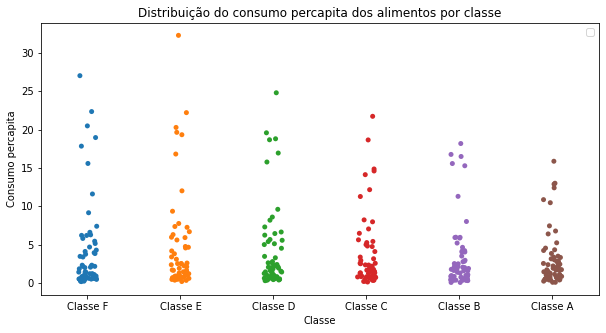

In [119]:
#Antes de gerar os gráficos de Desvio, vamos observar como nosso banco de dados se comporta
#em um gráfico de dispersão.
#Vamos pegar por classe nesse primeiro momento
plt.figure(figsize=(10,5))
sns.stripplot(data=consumo_2,x='Classe',y='Consumo percapita').set_title('Distribuição do consumo percapita dos alimentos por classe')
plt.legend([],[], frameon=True);

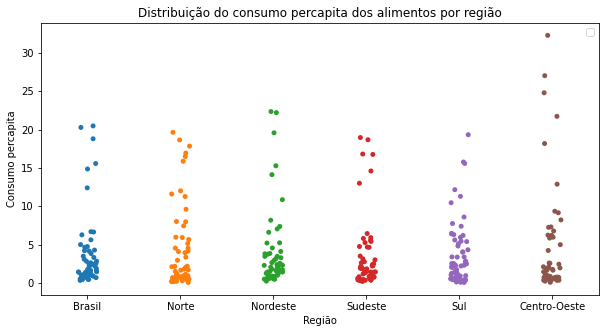

In [120]:
plt.figure(figsize=(10,5))
sns.stripplot(data=consumo_2,x='Região',y='Consumo percapita').set_title('Distribuição do consumo percapita dos alimentos por região')
plt.legend([],[], frameon=True);

###Agora, vamos calcular o desvio-padrão em duas fases:
1. Consumo alimentar percapita por classe em relação a cada alimento
2. Consumo alimentar percapita por região em relação a cada alimento

In [121]:
consu_desvio1=consumo_2.groupby(['Região','Items'])['Consumo percapita'].std().reset_index()
consu_desvio2=consumo_2.groupby(['Classe','Items'])['Consumo percapita'].std().reset_index()
consu_desvio1=consu_desvio1.rename(columns={'Consumo percapita':'Desvio-Padrão'})
consu_desvio2=consu_desvio2.rename(columns={'Consumo percapita':'Desvio-Padrão'})

In [122]:
consu_desvio1.head()

,Região,Items,Desvio-Padrão
0,Brasil,Arroz polido,3.282315
1,Brasil,Açúcar cristal,1.353377
2,Brasil,Café moído,0.210278
3,Brasil,Farinha de mandioca,1.175057
4,Brasil,Farinha de trigo,0.531805


In [123]:
consu_desvio2.head()

,Classe,Items,Desvio-Padrão
0,Classe A,Arroz polido,1.927469
1,Classe A,Açúcar cristal,2.156961
2,Classe A,Café moído,0.480475
3,Classe A,Farinha de mandioca,1.873781
4,Classe A,Farinha de trigo,2.052089


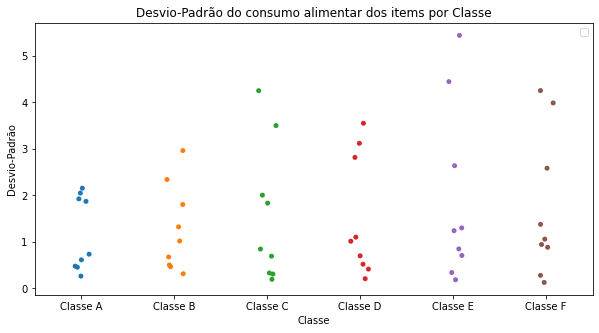

In [124]:
plt.figure(figsize=(10,5))
sns.stripplot(data=consu_desvio2,x='Classe',y='Desvio-Padrão').set_title('Desvio-Padrão do consumo alimentar dos items por Classe')
plt.legend([],[], frameon=True);

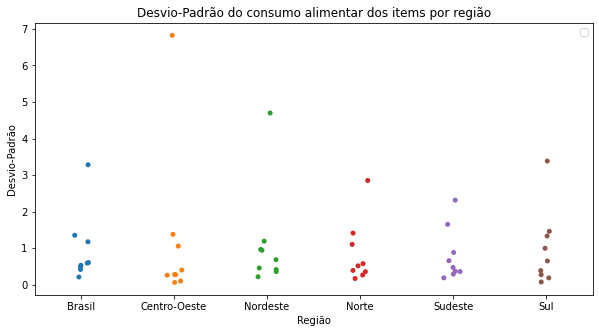

In [125]:
plt.figure(figsize=(10,5))
sns.stripplot(data=consu_desvio1,x='Região',y='Desvio-Padrão').set_title('Desvio-Padrão do consumo alimentar dos items por região')
plt.legend([],[], frameon=True);